# Principal Component Analysis with Cancer Data

In [124]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [125]:
colnames = ['sample_code_number', 'Clump_thickness', 'Uniformity_cell_size', 'Uniformity_cell_shape', 'Marginal_Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
cancer_df = pd.read_csv('breast-cancer-wisconsin.data.txt', sep=",", header=None, names = colnames)
cancer_df.head(10)

,sample_code_number,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [126]:
  # Id columns is to identify rows hence can be skipped in analysis
cancer_df.drop(['sample_code_number'], axis =1, inplace = True)
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done
cancer_df

,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [127]:
cancer_df.dtypes

Clump_thickness                 int64
Uniformity_cell_size            int64
Uniformity_cell_shape           int64
Marginal_Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [128]:
cancer_df.isnull().sum()
#Since I made inplace = true and replaced ?s with Naan and then changed it to int64, it is displaying the 16 NaaNs to int value


Clump_thickness                0
Uniformity_cell_size           0
Uniformity_cell_shape          0
Marginal_Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [129]:
cancer_df.shape

(699, 10)

In [130]:
cancer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_cell_size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_cell_shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bland Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [131]:
# We could see "?" values in column, this should be removed from data set
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].replace('?', np.NaN)
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].fillna(cancer_df['Bare Nuclei'].median())
# Check for missing value in any other column

In [132]:
cancer_df['Bare Nuclei'] = cancer_df['Bare Nuclei'].astype('int64')
cancer_df.dtypes

Clump_thickness                int64
Uniformity_cell_size           int64
Uniformity_cell_shape          int64
Marginal_Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [133]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [134]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [135]:
# Check for correlation of variable
cancer_df.corr()

,Clump_thickness,Uniformity_cell_size,Uniformity_cell_shape,Marginal_Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Uniformity_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Uniformity_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


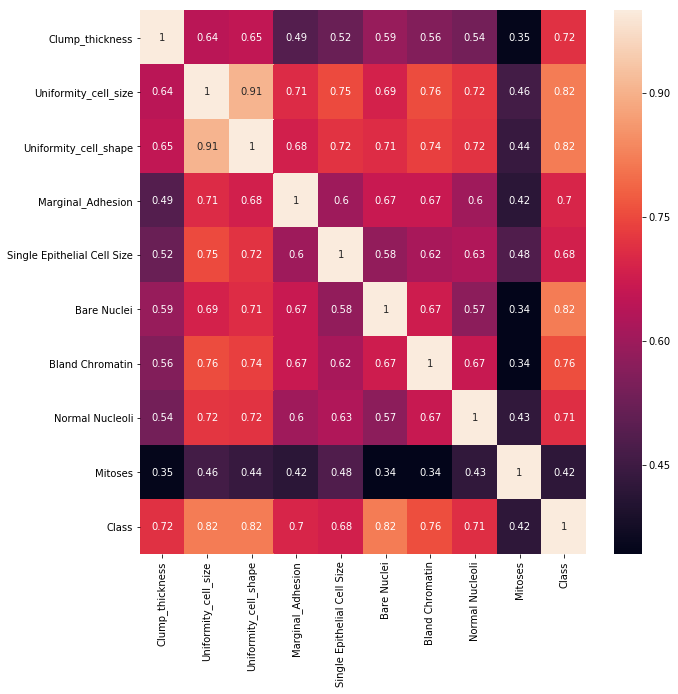

In [136]:
corrmat = cancer_df.corr()
plt.subplots(figsize = (10,10))
sns.heatmap(corrmat, annot=True)

In [137]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


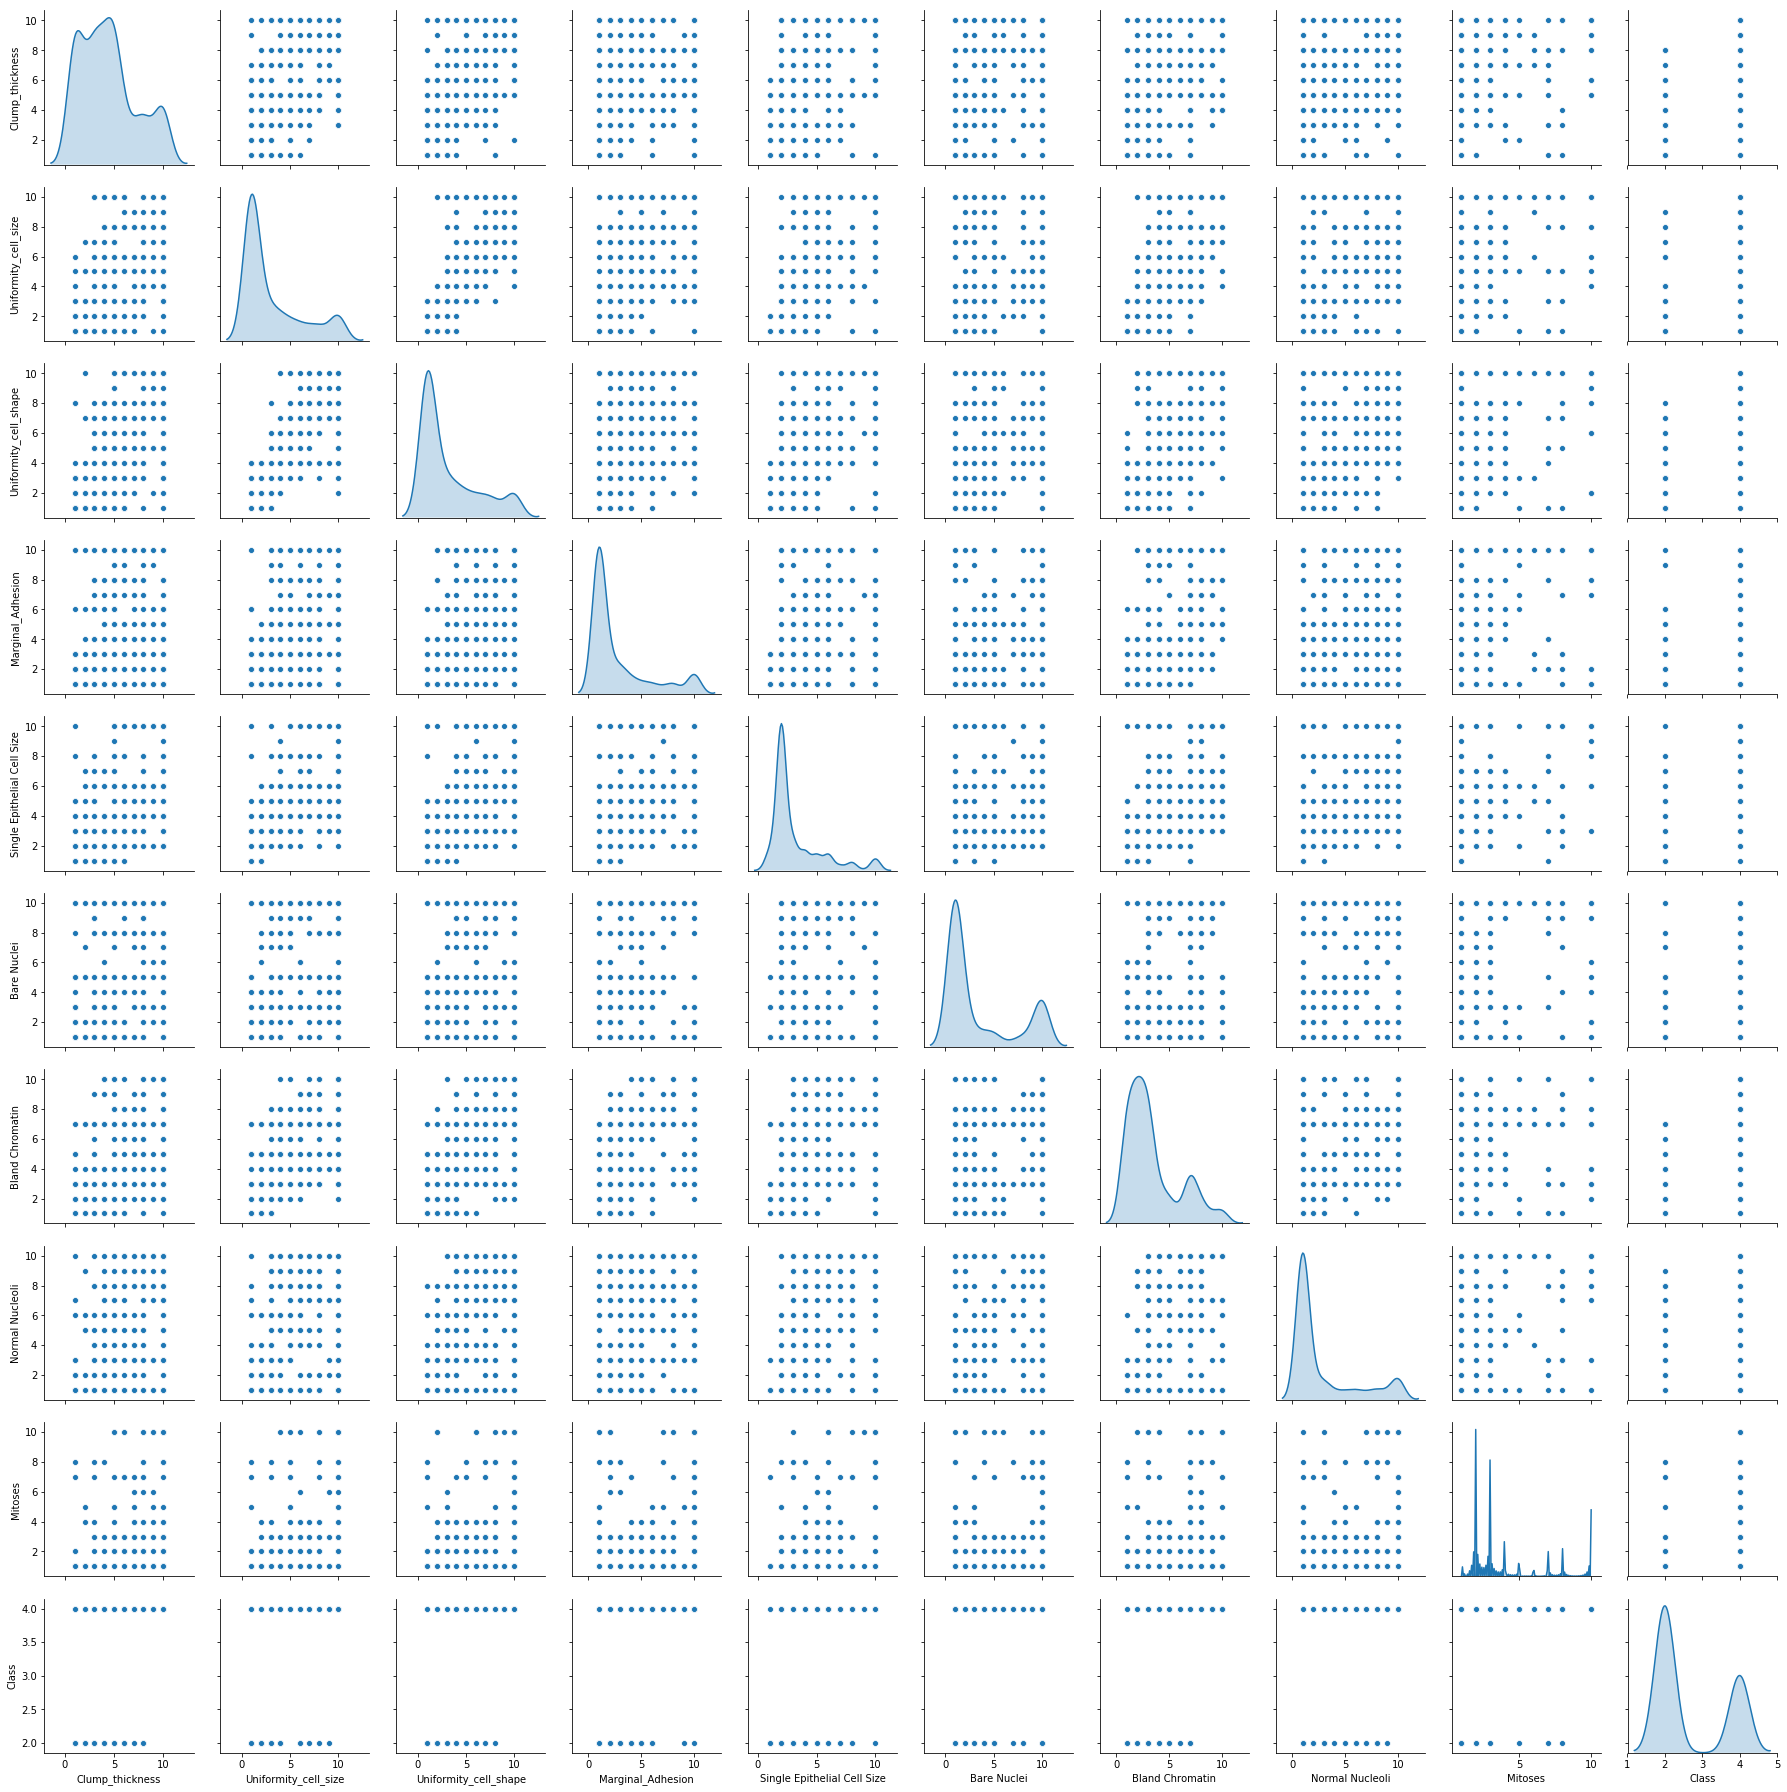

In [138]:
#Let us check for pair plots
sns.pairplot(cancer_df, diag_kind='kde') 

In [139]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

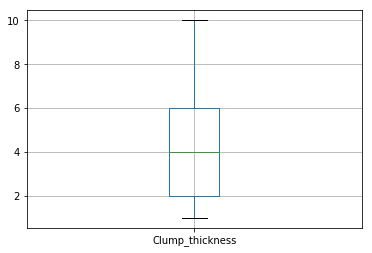

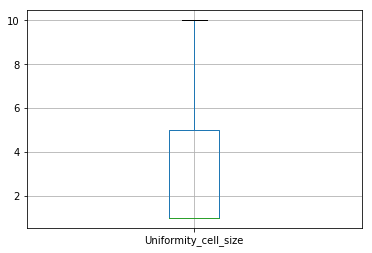

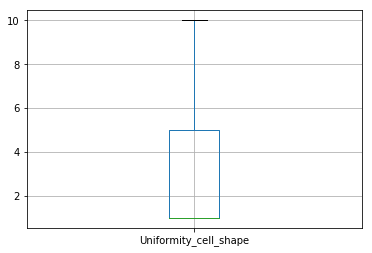

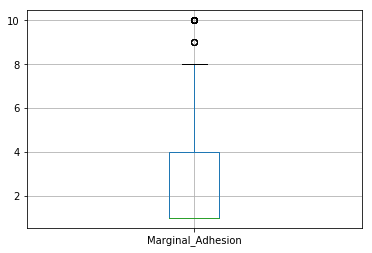

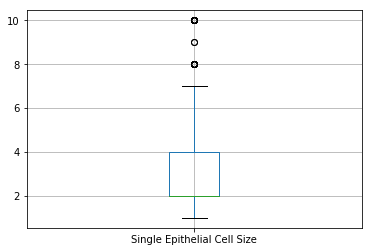

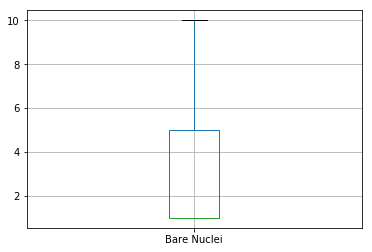

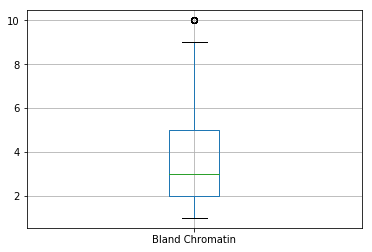

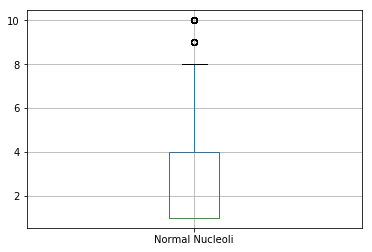

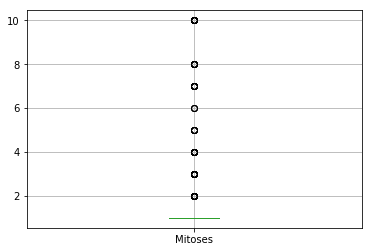

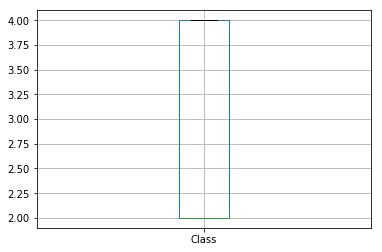

In [140]:
import matplotlib.pyplot as plt

for column in cancer_df:
    plt.figure()
    cancer_df.boxplot([column])

In [141]:
Q1 = cancer_df.quantile(0.25)
Q3 = cancer_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Clump_thickness                4.0
Uniformity_cell_size           4.0
Uniformity_cell_shape          4.0
Marginal_Adhesion              3.0
Single Epithelial Cell Size    2.0
Bare Nuclei                    4.0
Bland Chromatin                3.0
Normal Nucleoli                3.0
Mitoses                        0.0
Class                          2.0
dtype: float64


In [142]:
r1 = Q1 - 1.5 * IQR
r2 = Q3 + 1.5 * IQR

#We will use IQR to find outliers
print("Number of outliers in each columns")
((cancer_df < r1) | (cancer_df > r2)).sum()

Number of outliers in each columns


Clump_thickness                  0
Uniformity_cell_size             0
Uniformity_cell_shape            0
Marginal_Adhesion               60
Single Epithelial Cell Size     54
Bare Nuclei                      0
Bland Chromatin                 20
Normal Nucleoli                 77
Mitoses                        120
Class                            0
dtype: int64

In [143]:
cancer_df = cancer_df[~((cancer_df < (Q1 - 1.5 * IQR)) |(cancer_df > (Q3 + 1.5 * IQR))).any(axis=1)]
cancer_df.shape
# for item in ["Marginal_Adhesion","Uniformity_cell_size","BlandChromatin","NormalNucleoli","Mitoses"]:  
#     median = cancer_df[item].median();
#     cancer_df.loc[(cancer_df[item] < r1[item]) | (cancer_df[item] > r2[item]), item] = median

(504, 10)

In [144]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [145]:
# Split the wine data into separate training (70%) and test (30%) sets and then standardize it to unit variance:


X = cancer_df[cancer_df.columns[1:-1]]
y = cancer_df["Class"]
# remove target variable column before PCA as PCA does dimensionality reduction of independent variables only.
cancer_df.drop(['Class'], axis =1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [146]:
# PCA
# Step 1 - Create covariance matrix
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[1.00198807 0.90341002 0.66045709 0.65303246 0.71826063 0.62649642
  0.66951279 0.        ]
 [0.90341002 1.00198807 0.63199757 0.62699584 0.7295412  0.62987221
  0.63505046 0.        ]
 [0.66045709 0.63199757 1.00198807 0.52814522 0.64493837 0.48462521
  0.52186222 0.        ]
 [0.65303246 0.62699584 0.52814522 1.00198807 0.59745692 0.47471794
  0.51378159 0.        ]
 [0.71826063 0.7295412  0.64493837 0.59745692 1.00198807 0.6488328
  0.51779642 0.        ]
 [0.62649642 0.62987221 0.48462521 0.47471794 0.6488328  1.00198807
  0.52509275 0.        ]
 [0.66951279 0.63505046 0.52186222 0.51378159 0.51779642 0.52509275
  1.00198807 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [147]:
# Step 2- Get eigen values and eigen vector

In [148]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.42273715 -0.72900447  0.20865246  0.48330484  0.05928955 -0.09519975
   0.01217072  0.        ]
 [-0.41717909  0.67835387  0.1573519   0.58221713 -0.00254985 -0.04427618
  -0.00971278  0.        ]
 [-0.35735599  0.04833172  0.27728105 -0.34876303  0.3231681   0.34098435
   0.67136604  0.        ]
 [-0.35028993  0.03744187  0.10672121 -0.32673331  0.52010254  0.07917123
  -0.69352452  0.        ]
 [-0.39063222 -0.05144418 -0.80235276  0.02837437 -0.14537826  0.42313223
  -0.00303126  0.        ]
 [-0.34992021 -0.00205003  0.34691692 -0.34164594 -0.77465173  0.09000952
  -0.1796979   0.        ]
 [-0.34901416  0.04472077 -0.2816186  -0.28552108  0.01771514 -0.82419392
   0.18907247  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          1.        ]]

 Eigen Values 
%s [4.7279954  0.09539565 0.27098538 0.37598677 0.5449673  0.52500298
 0.47358302 0.        ]


In [149]:
# Eigen Values (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(4.727995403851915, array([-0.42273715, -0.41717909, -0.35735599, -0.35028993, -0.39063222,
       -0.34992021, -0.34901416,  0.        ])), (0.5449672962649067, array([ 0.05928955, -0.00254985,  0.3231681 ,  0.52010254, -0.14537826,
       -0.77465173,  0.01771514,  0.        ])), (0.5250029758515459, array([-0.09519975, -0.04427618,  0.34098435,  0.07917123,  0.42313223,
        0.09000952, -0.82419392,  0.        ])), (0.47358302080652104, array([ 0.01217072, -0.00971278,  0.67136604, -0.69352452, -0.00303126,
       -0.1796979 ,  0.18907247,  0.        ])), (0.3759867744173673, array([ 0.48330484,  0.58221713, -0.34876303, -0.32673331,  0.02837437,
       -0.34164594, -0.28552108,  0.        ])), (0.27098537553306135, array([ 0.20865246,  0.1573519 ,  0.27728105,  0.10672121, -0.80235276,
        0.34691692, -0.2816186 ,  0.        ])), (0.09539565426871971, array([-0.72900447,  0.67835387,  0.04833172,  0.03744187, -0.05144418,
       -0.00205003,  0.04472077,  0.        ])), (0.

# Q8 Find variance and cumulative variance by each eigen vector

In [150]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
print(var_explained)
print(cum_var_exp)

[0.674087780084329, 0.07769800170670295, 0.07485161475434453, 0.06752048170795918, 0.05360582413036726, 0.038635386591023196, 0.013600911025273811, 0.0]
[0.67408778 0.75178578 0.8266374  0.89415788 0.9477637  0.98639909
 1.         1.        ]


In [151]:
# plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
# plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal components')
# plt.legend(loc = 'best')
# plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [152]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
print(principalComponents)

[[-1.64777397 -0.10994402  1.03926955  0.09613771 -0.23843125]
 [ 8.62383123 -3.45347899 -2.61619925 -1.06970867 -0.35007421]
 [-1.03579014 -0.842708    0.8992518   0.08056943  0.01084338]
 ...
 [-2.26279597 -0.07323452 -0.77015492 -0.01966502  0.33290869]
 [-1.4709998  -0.73040351 -0.99892304 -0.09458046  0.6124223 ]
 [-2.26279597 -0.07323452 -0.77015492 -0.01966502  0.33290869]]


In [153]:
pca = PCA()
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [154]:
pca.components_

array([[ 0.42273715,  0.41717909,  0.35735599,  0.35028993,  0.39063222,
         0.34992021,  0.34901416,  0.        ],
       [-0.05928955,  0.00254985, -0.3231681 , -0.52010254,  0.14537826,
         0.77465173, -0.01771514,  0.        ],
       [ 0.09519975,  0.04427618, -0.34098435, -0.07917123, -0.42313223,
        -0.09000952,  0.82419392,  0.        ],
       [-0.01217072,  0.00971278, -0.67136604,  0.69352452,  0.00303126,
         0.1796979 , -0.18907247,  0.        ],
       [ 0.48330484,  0.58221713, -0.34876303, -0.32673331,  0.02837437,
        -0.34164594, -0.28552108,  0.        ],
       [-0.20865246, -0.1573519 , -0.27728105, -0.10672121,  0.80235276,
        -0.34691692,  0.2816186 ,  0.        ],
       [ 0.72900447, -0.67835387, -0.04833172, -0.03744187,  0.05144418,
         0.00205003, -0.04472077,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ]])

In [155]:
pca.explained_variance_

array([4.7279954 , 0.5449673 , 0.52500298, 0.47358302, 0.37598677,
       0.27098538, 0.09539565, 0.        ])

In [156]:
pca.explained_variance_ratio_

array([0.67408778, 0.077698  , 0.07485161, 0.06752048, 0.05360582,
       0.03863539, 0.01360091, 0.        ])

In [157]:
P_reduce = np.array(eigvectors_sorted[0:7])   # Reducing from 8 to 4 dimension space

X_std_7D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_7D)  # converting array to dataframe for pairplot

# Q10 Find correlation between components and features

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


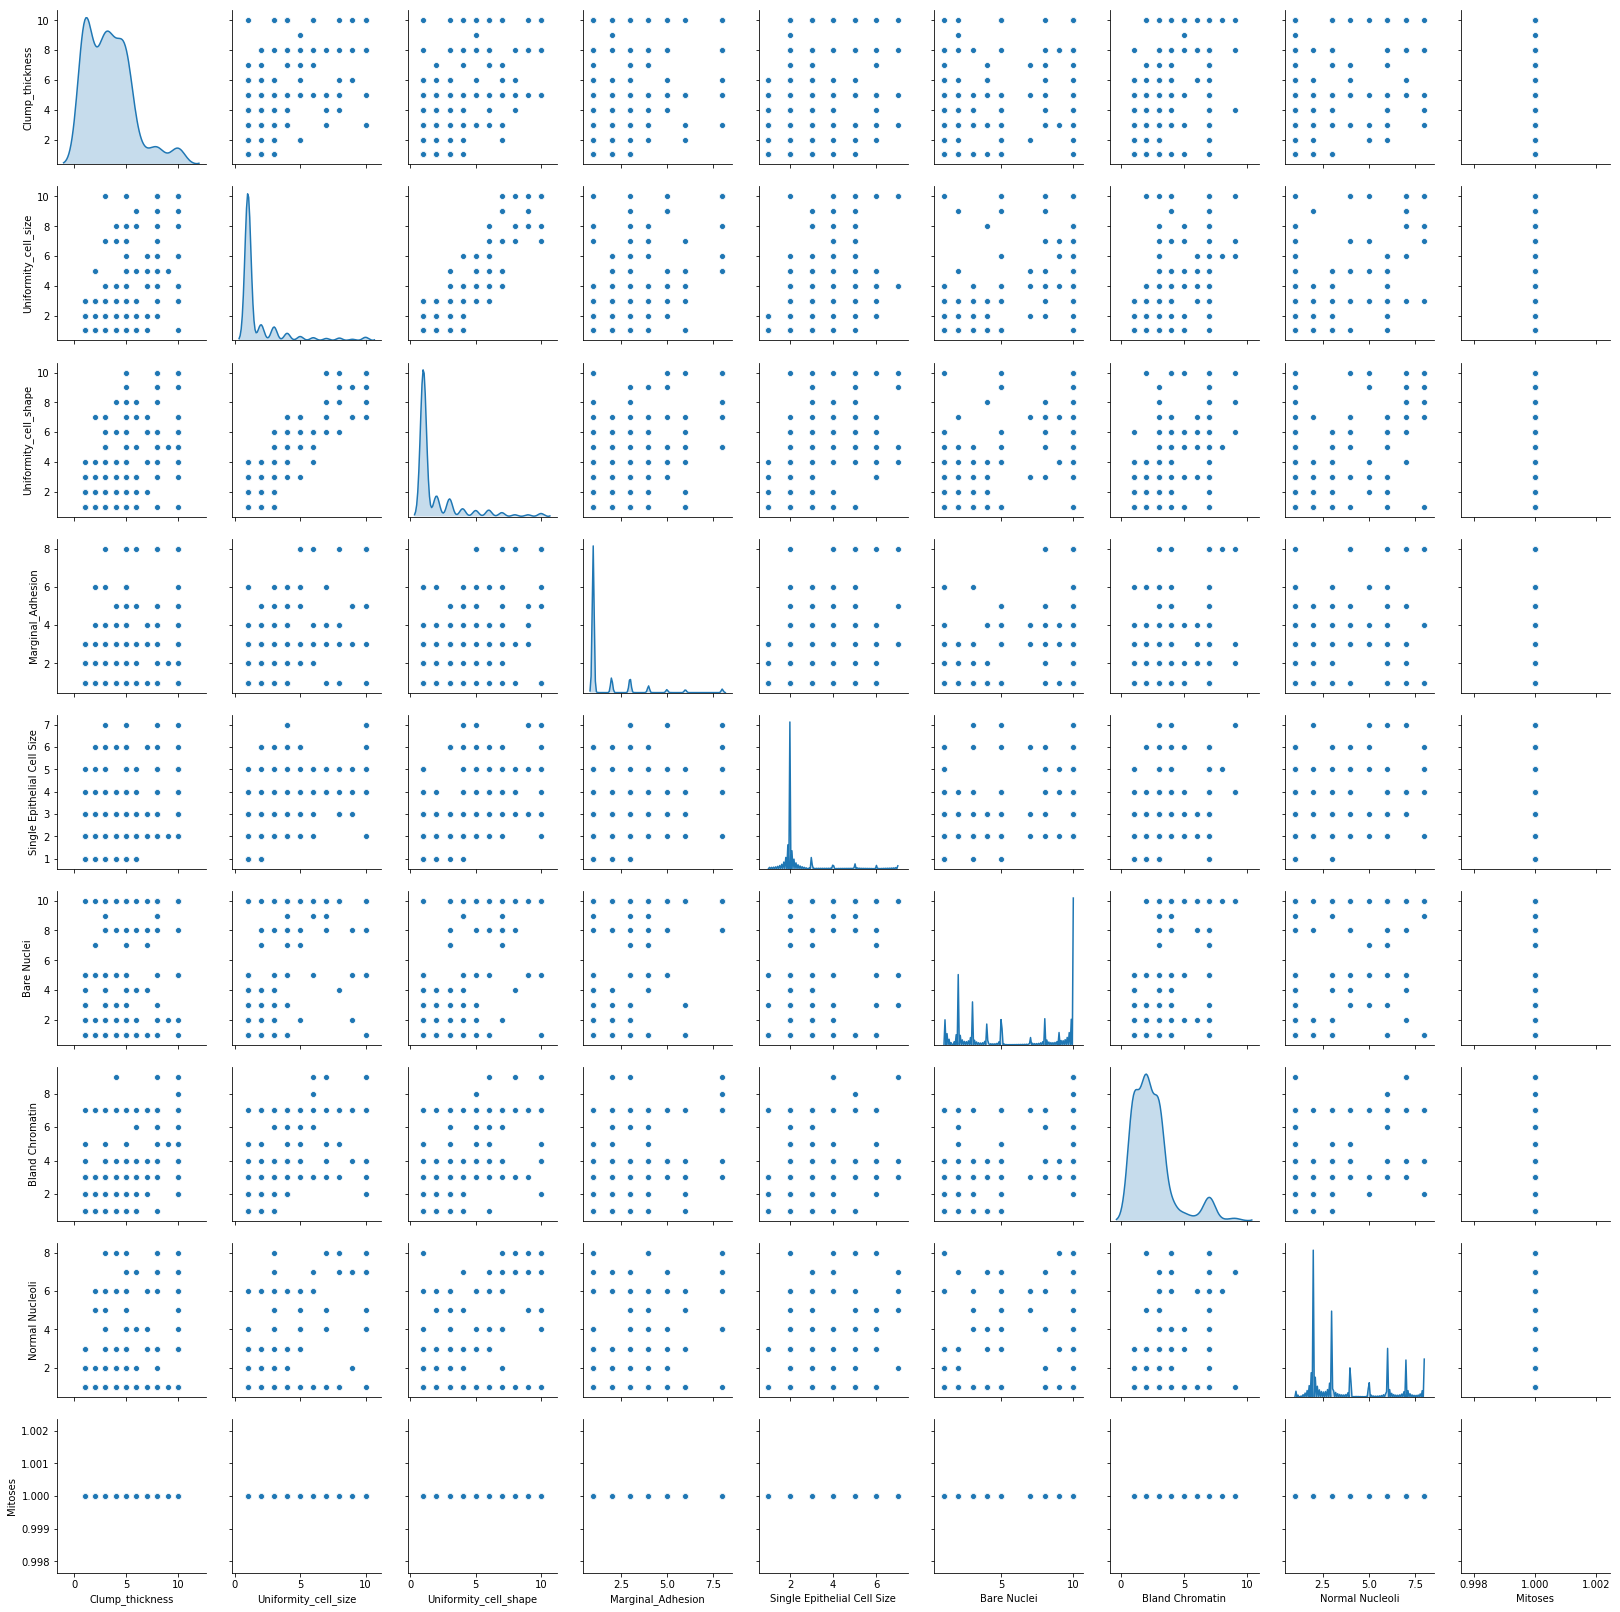

In [158]:
sns.pairplot(cancer_df, diag_kind='kde') 

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

In [159]:
movies_df = pd.read_csv('movies_metadata.csv')
movies_df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

In [175]:
movies_df["description"] = movies_df.fillna('')["tagline"] + "-" + movies_df.fillna('')["overview"]
movies_df["description"] = movies_df["description"].replace('-',np.NaN)
# movies_df['description'] = movies_df['overview'] + movies_df['tagline']
# movies_df['description']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Q13  Lets drop the null values in `description` column

In [176]:
movies_df = movies_df.dropna(subset=['description'])
movies_df['description']

1        Roll the dice and unleash the excitement!-When...
2        Still Yelling. Still Fighting. Still Ready for...
3        Friends are the people who let you be yourself...
4        Just When His World Is Back To Normal... He's ...
5        A Los Angeles Crime Saga-Obsessive master thie...
6        You are cordially invited to the most surprisi...
7        The Original Bad Boys.-A mischievous young boy...
8        Terror goes into overtime.-International actio...
9        No limits. No fears. No substitutes.-James Bon...
10       Why can't the most powerful man in the world h...
12       Part Dog. Part Wolf. All Hero.-An outcast half...
13       Triumphant in Victory, Bitter in Defeat. He Ch...
14       The Course Has Been Set. There Is No Turning B...
15       No one stays at the top forever.-The life of t...
16       Lose your heart and come to your senses.-Rich ...
17       Twelve outrageous guests. Four scandalous requ...
18       New animals. New adventures. Same hair.-Summon.

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

In [162]:
movies_df.drop_duplicates(subset='title', keep='first', inplace=False)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,description
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,When siblings Judy and Peter discover an encha...
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,A family wedding reignites the ancient feud be...
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"Cheated on, mistreated and stepped on, the wom..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Just when George Banks has recovered from his ...
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,"Obsessive master thief, Neil McCauley leads a ..."
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,An ugly duckling having undergone a remarkable...
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,"A mischievous young boy, Tom Sawyer, witnesses..."
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,International action superstar Jean Claude Van...
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,James Bond must unmask the mysterious head of ...
10,False,NaN,62000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,9087,tt0112346,en,The American President,"Widowed U.S. president Andrew Shepherd, one of...",...,107879496.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Why can't the most powerful man in the world h...,The American President,False,6.5,199.0,"Widowed U.S. president Andrew Shepherd, one of..."


# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

In [163]:
movies_df.reset_index(drop = True)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,description
0,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,When siblings Judy and Peter discover an encha...
1,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,A family wedding reignites the ancient feud be...
2,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"Cheated on, mistreated and stepped on, the wom..."
3,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Just when George Banks has recovered from his ...
4,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,"Obsessive master thief, Neil McCauley leads a ..."
5,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,An ugly duckling having undergone a remarkable...
6,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,"A mischievous young boy, Tom Sawyer, witnesses..."
7,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,International action superstar Jean Claude Van...
8,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,James Bond must unmask the mysterious head of ...
9,False,NaN,62000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,9087,tt0112346,en,The American President,"Widowed U.S. president Andrew Shepherd, one of...",...,107879496.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Why can't the most powerful man in the world h...,The American President,False,6.5,199.0,"Widowed U.S. president Andrew Shepherd, one of..."


# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies_df['description'])
tfidf_matrix.shape

(20404, 1198573)

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [165]:
jokesDf = pd.read_csv("jokes.csv")
jokesDf.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [166]:
jokesDf.shape

(24983, 101)

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [167]:
ratings = pd.DataFrame( jokesDf.iloc[:200,1:])
ratings.shape

(200, 100)

# Q22 Change the column indices from 0 to 99

In [168]:
ratings.columns = np.arange(0,100)
ratings.head(2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [169]:
ratings = ratings.replace(99,0)
ratings.head(2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [170]:
sc = StandardScaler()
ratings_diff = pd.DataFrame(sc.fit_transform(ratings))
ratings_diff.head(2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.24083,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.50553,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461


In [171]:
ratings_Trans = ratings_diff.T

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [172]:
ratings_Trans["mean"] = ratings_Trans.mean(axis = 0)

In [173]:
ratings_Trans.sort_values(["mean"],ascending=False).head(10)["mean"]
#top 10 jokes number 94,44,86,13,17,73,46,34,2,36 

94    1.033314
44    1.014903
86    0.984949
13    0.879180
17    0.774465
73    0.767659
46    0.748349
34    0.627019
2     0.597521
36    0.593331
Name: mean, dtype: float64